In [172]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [166]:
A = np.array([[ -1,  -1,  -1],
             [ -1,   -1,  -1],
             [ -1,   -1,  -1]])
nash_equilibrium(A)

Система не имеет решений


value =  2.0 ;
P =  [0. 0. 1.] ;
Q =  [0. 0. 1.] ;


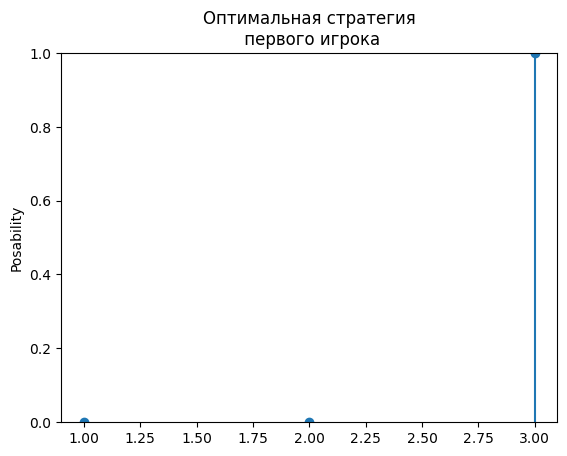

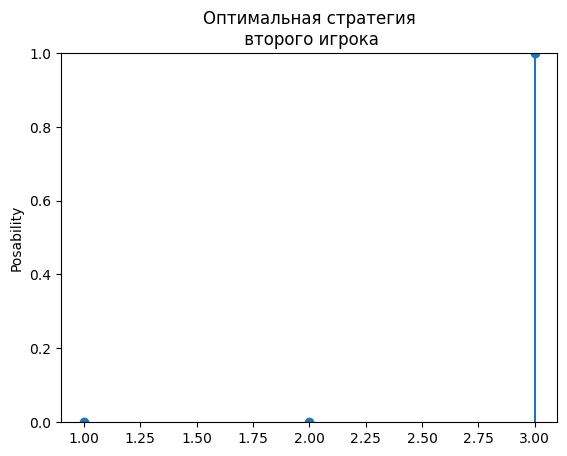

In [180]:
#Матричная игра, в которой спектр оптимальной стратегии состоит из одной точки

A = np.array([[ 0.43,  0.62,  0.24],
             [ 0.3,   1.5,  -0.8 ],
             [ 0.85,   1,   0.5 ]])
nash_equilibrium(A)

value =  0.2052980132450331 ;
P =  [0.         0.12903226 0.09677419 0.43548387 0.33870968 0.        ] ;
Q =  [0.         0.12903226 0.09677419 0.43548387 0.33870968 0.        ] ;


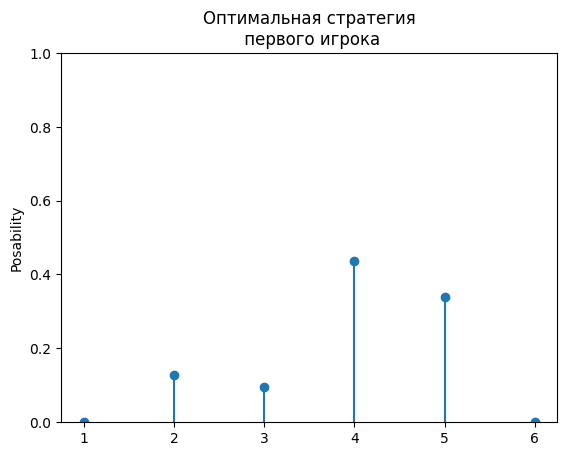

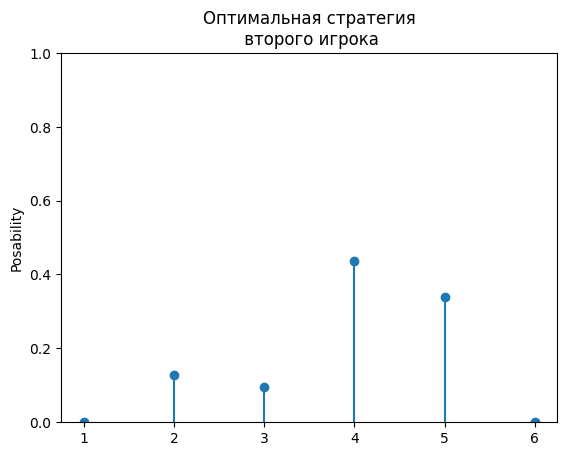

In [179]:
#Матричная игра, в которой спектр оптимальной стратегии неполон

A = np.array([[4, 0, 6, 2, 2, 1],
             [3, 8, 4, 10, 4, 4],
             [1, 2, 6, 5, 0, 0],
             [6, 6, 4, 4, 10, 3],
             [10, 4, 6, 4, 0, 9],
             [10, 7, 0, 7, 9, 8]])
nash_equilibrium(A)


value =  0.888888888888889 ;
P =  [0.375 0.375 0.25 ] ;
Q =  [0.375 0.375 0.25 ] ;


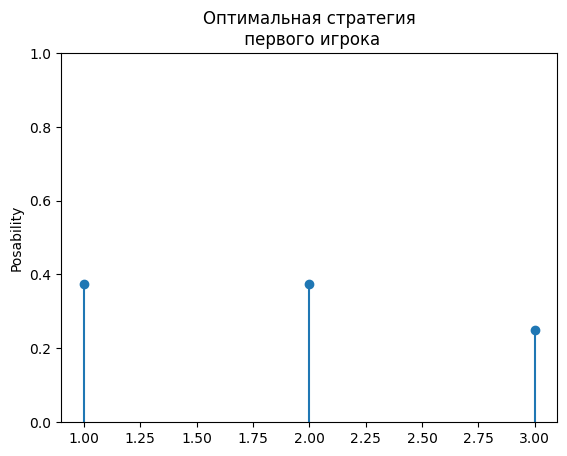

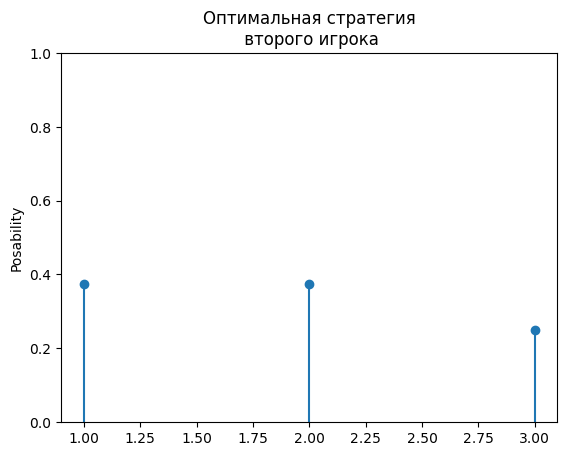

In [178]:
#Матричная игра, в которой спектр оптимальной стратегии полон

A = np.array([[1,  2,  1],
             [ 2,  1,  0 ],
             [ 0,  0,  3]])
nash_equilibrium(A)

In [177]:
def visual_res(res = None, res1 = None):
    x = list(range(1, len(res)+1))
    x1 = list(range(1, len(res1)+1))
    
    #Создаём график Lollipop первого игрока
    fig, axes = plt.subplots()
    axes.stem(x, res, 
          use_line_collection=True, basefmt=' ') 
    axes.set_ylim(0, 1)
    plt.ylabel('Posability')
    plt.title('Оптимальная стратегия\n первого игрока')
    
    #Создаём график Lollipop второго игрока
    fig, axes = plt.subplots()
    axes.stem(x1, res1, 
          use_line_collection=True, basefmt=' ') 
    axes.set_ylim(0, 1) 
    plt.ylabel('Posability')
    plt.title('Оптимальная стратегия\n второго игрока')

In [176]:
def nash_equilibrium(A):
    
    #решение ЗЛП для первого игрока, нахождение оптимальной стратегии и значения игры
    c1 = np.ones(np.shape(A)[0]) #коэфициенты функции F, которую мы собираемся минимизировать
    b1 = np.ones(np.shape(A)[1])*(-1) #значения, стоящие с правой стороны неравенств(с минусом, потому что, нам нужно добится знака '<=')
    bnds1 = [(0, None)] * np.shape(A)[0] #ограничения на переменные [0, inf)
    res = sp.optimize.linprog(c1, A_ub = A.transpose()*(-1), b_ub = b1, bounds = bnds1) #собственно решаем ЗЛП
    if res.status == 2:
        print("Система не имеет решений!")
        return
    val = 1/res.fun
    if val:
        x = res.x*val
    else:
        x = res.x
    print('value = ', val, ';\nP = ', x, ';')
    
    #решение ЗЛП для второго игрока, нахождение оптимальной стратегии
    c2 = np.ones(np.shape(A)[1])*(-1) #с минусом для того, чтобы максимизировать функцию F, путём минимизирования функции -F
    b2 = np.ones(np.shape(A)[0])
    bnds2 = [(0, None)] * np.shape(A)[1]
    res1 = sp.optimize.linprog(c2, A_ub = A, b_ub = b2, bounds = bnds2)
    if val:
        y = res.x*val
    else:
        y = res.x
    print('Q = ', y, ';')
    
    #визуализация оптимальных стратегий
    visual_res(x, y)